In [74]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import glob
import os
import re
import patsy
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics


In [39]:
# Current Listing for Zip Code 95131, reserved for predictions and testing
df95131 = pd.read_csv("./95131.csv")

df1 = df95131[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df1 = df1[df1["PROPERTY TYPE"] != 'Mobile/Manufactured Home']

df1

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,Townhouse,899000,2,2.5,1213.0,619.0,2007.0,741.0,150.0
1,Single Family Residential,899999,2,2.5,1093.0,2941.0,1984.0,823.0,81.0
2,Single Family Residential,1788888,4,3.0,2668.0,4237.0,1999.0,670.0,NaN
3,Townhouse,1079000,2,3.0,1622.0,658.0,2014.0,665.0,275.0
4,Single Family Residential,1180000,3,2.5,1662.0,3982.0,1986.0,710.0,60.0
6,Single Family Residential,1199000,3,2.0,1497.0,6301.0,1974.0,801.0,NaN
7,Condo/Co-op,988000,2,2.0,1371.0,1885.0,2018.0,721.0,285.0
10,Condo/Co-op,698000,1,1.5,1415.0,NaN,2006.0,493.0,365.0
11,Townhouse,849888,4,1.5,1452.0,1558.0,1977.0,585.0,280.0
12,Single Family Residential,875000,3,2.0,1041.0,6113.0,1974.0,841.0,NaN


In [38]:
# Current Listing for Zip Code 95132, reserved for predictions and testing
df95132 = pd.read_csv("./95132.csv")

df2 = df95132[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df2 = df2[df2["PROPERTY TYPE"] != 'Vacant Land']

df2

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH
0,Single Family Residential,1100000,4.0,2.0,1305.0,7518.0,1972.0,843.0,NaN
1,Single Family Residential,1300000,5.0,4.0,1804.0,6098.0,1971.0,721.0,NaN
2,Single Family Residential,1199500,3.0,2.5,1938.0,6000.0,1964.0,619.0,NaN
3,Single Family Residential,1130000,3.0,2.0,1372.0,6646.0,1970.0,824.0,NaN
4,Single Family Residential,600000,3.0,1.0,1248.0,6061.0,1963.0,481.0,NaN
5,Townhouse,779888,4.0,2.5,1474.0,1026.0,1973.0,529.0,240.0
7,Townhouse,688000,2.0,1.0,888.0,1626.0,1976.0,775.0,350.0
8,Single Family Residential,1250000,4.0,2.0,1480.0,7360.0,1971.0,845.0,NaN
9,Townhouse,798000,3.0,2.5,1452.0,1694.0,1976.0,550.0,350.0
10,Single Family Residential,2150000,3.0,2.0,1448.0,17474.0,1956.0,1485.0,NaN


In [235]:
# Properties sold in 95131 for the past year
df95131sold = pd.read_csv("./95131 sold.csv")

df3 = df95131sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df3 = df3[df3["PROPERTY TYPE"] != 'Mobile/Manufactured Home']

df3.dropna(subset=['BEDS', 'BATHS'], inplace=True)

df3["AGE OF HOME"] = 2020 - df3["YEAR BUILT"]

df3

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Condo/Co-op,825000,2.00,2.00,"1,157.00",nan,"1,993.00",713.00,265.00,27.00
1,Condo/Co-op,1025000,3.00,2.50,"1,790.00",915.00,"1,993.00",573.00,299.00,27.00
2,Condo/Co-op,1190000,3.00,3.50,"1,718.00",621.00,"2,015.00",693.00,275.00,5.00
3,Townhouse,1051000,4.00,3.00,"2,009.00","3,200.00","1,989.00",523.00,265.00,31.00
4,Townhouse,1040000,3.00,2.50,"1,666.00","2,547.00","1,989.00",624.00,265.00,31.00
...,...,...,...,...,...,...,...,...,...,...
214,Townhouse,960000,3.00,3.00,"1,536.00",645.00,"2,008.00",625.00,182.00,12.00
215,Condo/Co-op,930000,3.00,2.00,"1,546.00","1,546.00","2,006.00",602.00,320.00,14.00
216,Condo/Co-op,1250000,4.00,3.00,"2,036.00",nan,"2,006.00",614.00,nan,14.00
217,Townhouse,1115000,4.00,4.00,"1,573.00",784.00,"2,009.00",709.00,150.00,11.00


In [35]:
df3.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
count,1.910000e+02,191.000000,191.000000,191.000000,175.000000,191.000000,191.000000,120.000000,191.000000
mean,1.040718e+06,3.120419,2.447644,1567.518325,3364.965714,1993.926702,671.628272,298.716667,26.073298
std,3.346644e+05,0.984700,0.642677,433.803592,2466.647576,15.218578,137.728463,141.102751,15.218578
min,4.170000e+05,1.000000,1.000000,645.000000,1.000000,1970.000000,244.000000,33.000000,1.000000
25%,8.515000e+05,2.000000,2.000000,1231.000000,1294.500000,1985.000000,609.000000,239.750000,12.500000
50%,1.060000e+06,3.000000,2.500000,1618.000000,2708.000000,1990.000000,658.000000,283.000000,30.000000
75%,1.207875e+06,4.000000,3.000000,1851.000000,5627.000000,2007.500000,713.000000,383.500000,35.000000
max,3.810000e+06,6.000000,4.500000,2668.000000,11759.000000,2019.000000,2059.000000,657.000000,50.000000


In [33]:
# Properties sold in 95132 for the past year
df95132sold = pd.read_csv("./95132 sold.csv")

df4 = df95132sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df4 = df4[df4["PROPERTY TYPE"] != 'Vacant Land']

df4.dropna(subset=['BEDS', 'BATHS'], inplace=True)

df4["AGE OF HOME"] = 2020 - df4["YEAR BUILT"]

df4

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Townhouse,800000.0,4.0,2.5,1474.0,1055.0,1970.0,543.0,235.0,50.0
1,Condo/Co-op,810088.0,2.0,2.5,1450.0,1300.0,2014.0,559.0,210.0,6.0
2,Condo/Co-op,600000.0,2.0,1.0,884.0,1440.0,1971.0,679.0,230.0,49.0
4,Single Family Residential,1050000.0,4.0,2.0,1480.0,6307.0,1970.0,709.0,NaN,50.0
5,Single Family Residential,1072500.0,3.0,2.0,1372.0,6202.0,1971.0,782.0,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...
245,Single Family Residential,1475000.0,4.0,2.5,2510.0,8001.0,1971.0,588.0,NaN,49.0
246,Condo/Co-op,595000.0,2.0,2.0,831.0,931.0,1988.0,716.0,330.0,32.0
247,Single Family Residential,1030000.0,5.0,3.0,1786.0,6099.0,1964.0,577.0,NaN,56.0
249,Single Family Residential,1025000.0,4.0,2.0,1659.0,5962.0,1967.0,618.0,NaN,53.0


In [40]:
df4.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
count,2.400000e+02,242.000000,242.000000,242.000000,235.000000,242.000000,240.000000,51.000000,242.000000
mean,1.092109e+06,3.500000,2.219008,1640.342975,10061.587234,1973.020661,687.237500,264.392157,46.979339
std,2.694721e+05,0.879693,0.548073,525.172584,40065.193544,10.707909,145.043486,120.185703,10.707909
min,4.500000e+05,1.000000,1.000000,677.000000,566.000000,1928.000000,390.000000,15.000000,6.000000
25%,9.442500e+05,3.000000,2.000000,1356.500000,5953.000000,1969.000000,587.000000,210.000000,45.000000
50%,1.100000e+06,4.000000,2.000000,1546.500000,6200.000000,1971.000000,676.500000,275.000000,49.000000
75%,1.236625e+06,4.000000,2.500000,1837.250000,6855.500000,1975.000000,773.000000,375.000000,51.000000
max,2.454000e+06,6.000000,4.500000,4107.000000,596772.000000,2014.000000,1690.000000,425.000000,92.000000


In [239]:
# Training and Testing 95131 and 95132 Separately
dummies = pd.get_dummies(df3["PROPERTY TYPE"])
#df3 = pd.concat([df3, dummies], axis=1)
df3
train, test = train_test_split(df3, test_size=0.2)
train

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
141,Single Family Residential,1275000,4.00,2.00,"2,206.00","6,323.00","1,981.00",578.00,nan,39.00,0,1,0
153,Single Family Residential,1278000,4.00,2.50,"1,816.00","6,168.00","1,987.00",704.00,nan,33.00,0,1,0
179,Single Family Residential,1438000,4.00,2.50,"2,139.00","2,988.00","2,014.00",672.00,nan,6.00,0,1,0
56,Single Family Residential,950000,4.00,3.00,"1,350.00","6,059.00","1,970.00",704.00,nan,50.00,0,1,0
215,Condo/Co-op,930000,3.00,2.00,"1,546.00","1,546.00","2,006.00",602.00,320.00,14.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Single Family Residential,1050000,4.00,2.50,"1,618.00","3,665.00","1,985.00",649.00,nan,35.00,0,1,0
181,Condo/Co-op,665000,2.00,2.00,922.00,886.00,"1,988.00",721.00,440.00,32.00,1,0,0
134,Condo/Co-op,620000,2.00,2.00,966.00,"8,661.00","1,990.00",642.00,293.00,30.00,1,0,0
147,Condo/Co-op,675000,3.00,2.00,"1,136.00","1,507.00","1,986.00",594.00,528.00,34.00,1,0,0


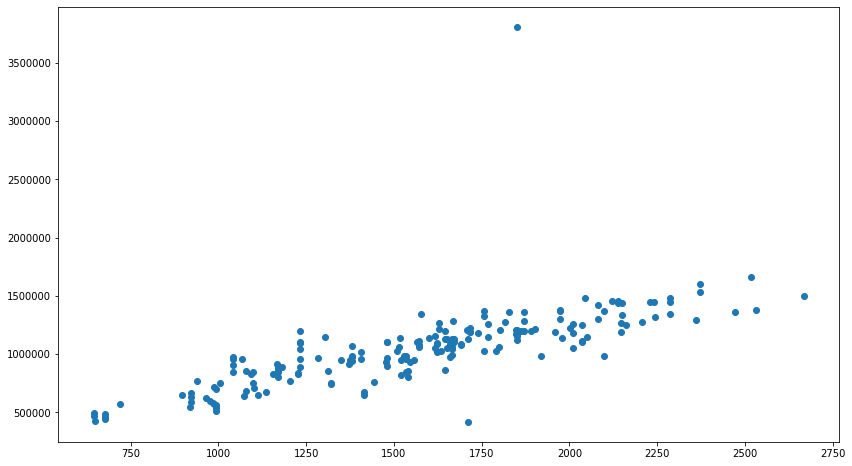

In [42]:
# SQUARE FOOTAGE AND PRICE of 95131
fig, ax = plt.subplots(figsize=(14,8))
scatterplot = plt.scatter(df3['SQUARE FEET'], df3['PRICE'])


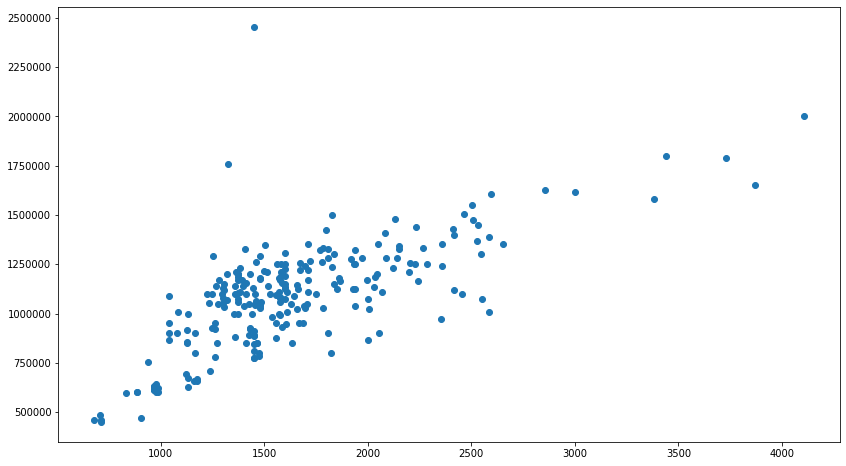

In [44]:
# SQUARE FOOTAGE AND PRICE of 95132

fig1, ax1 = plt.subplots(figsize=(14,8))
scatterplot1 = plt.scatter(df4['SQUARE FEET'], df4['PRICE'])


In [240]:
X_train = train[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_train = train["PRICE"]
X_test = test[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_test = test["PRICE"]

X_train



,BEDS,BATHS,SQUARE FEET,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
141,4.00,2.00,"2,206.00",39.00,0,1,0
153,4.00,2.50,"1,816.00",33.00,0,1,0
179,4.00,2.50,"2,139.00",6.00,0,1,0
56,4.00,3.00,"1,350.00",50.00,0,1,0
215,3.00,2.00,"1,546.00",14.00,1,0,0
...,...,...,...,...,...,...,...
114,4.00,2.50,"1,618.00",35.00,0,1,0
181,2.00,2.00,922.00,32.00,1,0,0
134,2.00,2.00,966.00,30.00,1,0,0
147,3.00,2.00,"1,136.00",34.00,1,0,0


In [241]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)
y_pred


array([1194626.10974432,  976362.35221228, 1161617.72512093,
        673314.43238358, 1357685.18842275, 1444451.10294402,
       1371117.16166628, 1318424.99588864, 1313968.49422827,
        912919.42546876,  499072.37822476,  704206.98808152,
        811679.76848932,  973119.46745946,  647032.83234679,
        657071.6078281 , 1372107.28124105, 1161617.72512093,
        505530.82861986, 1136039.8430612 , 1193298.68124406,
        999100.25381547,  502082.208962  , 1528548.63664493,
       1023870.57175517,  955922.90648213, 1154493.94376968,
       1101173.49075875, 1267995.44997815, 1526916.62704898,
       1116498.65735068, 1371117.16166628,  951315.96657643,
        816286.70839502,  985279.43409836, 1083849.06549068,
       1463573.08049899, 1669362.69225119, 1079242.12558497])

In [242]:
pd.options.display.float_format = '{:,.2f}'.format

dfTvP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfTvP

,Actual,Predicted
65,1174000,"1,194,626.11"
164,818000,"976,362.35"
21,1216000,"1,161,617.73"
27,600000,"673,314.43"
193,1300000,"1,357,685.19"
212,1338888,"1,444,451.10"
19,1300000,"1,371,117.16"
67,1200000,"1,318,425.00"
94,1140000,"1,313,968.49"
106,955000,"912,919.43"


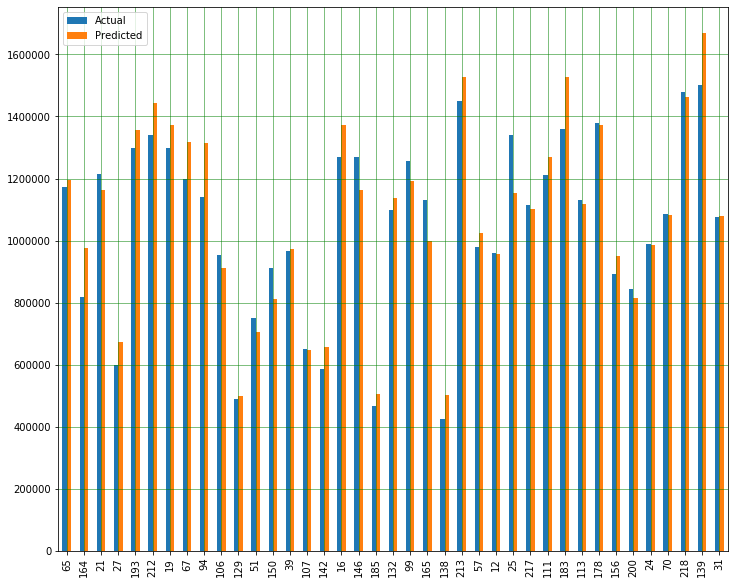

In [243]:
dfTvP.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [244]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test/1000, y_pred/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test/1000, y_pred/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test/1000, y_pred/1000)))


Mean Absolute Error: 64.7351198596936
Mean Squared Error: 7067.540277222327
Root Mean Squared Error: 84.06866406231472


In [192]:
rm = linear_model.Ridge(alpha = 300)
ridge_model = rm.fit(X_train,y_train)

y_pred1 = rm.predict(X_test)


In [193]:
pd.options.display.float_format = '{:,.2f}'.format

dfRM = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
dfRM

,Actual,Predicted
54,1125000,"1,219,692.24"
201,1030000,"1,080,882.00"
196,1220800,"1,151,869.84"
198,577500,"694,978.87"
125,915000,"954,658.19"
213,1450000,"1,443,514.48"
105,1340000,"1,431,031.76"
94,1140000,"1,302,796.29"
26,980000,"906,928.21"
44,650000,"950,384.06"


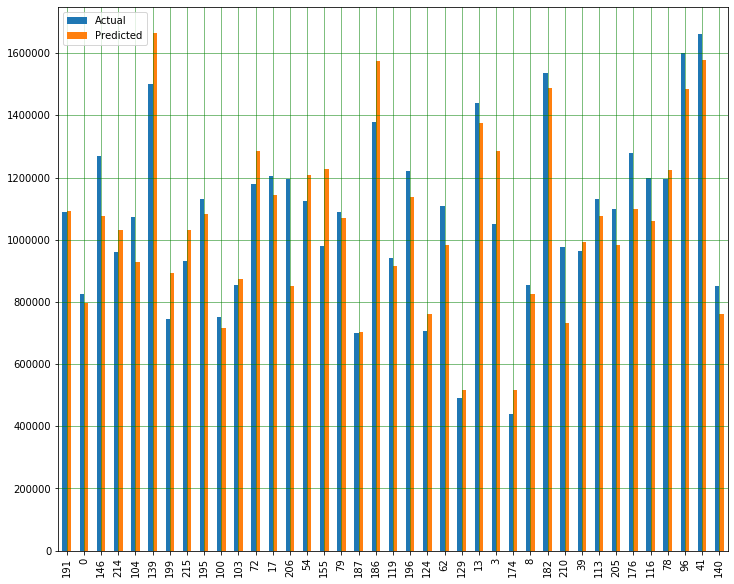

In [104]:
dfRM.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test/1000, y_pred1/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test/1000, y_pred1/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test/1000, y_pred1/1000)))


Mean Absolute Error: 98.79991327011933
Mean Squared Error: 15864.90378565474
Root Mean Squared Error: 125.95595970677505


In [217]:
df4 = df4.dropna(subset=["PRICE", "BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME"])
train1, test1 = train_test_split(df4, test_size=0.2)
train1

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
135,Single Family Residential,"1,200,000.00",3.00,2.00,"1,320.00","6,120.00","1,969.00",909.00,nan,51.00
215,Single Family Residential,"2,000,000.00",4.00,3.50,"4,107.00","596,772.00","1,991.00",487.00,nan,29.00
126,Single Family Residential,"1,110,006.00",3.00,2.00,"1,571.00","6,090.00","1,970.00",707.00,nan,50.00
113,Single Family Residential,"1,280,000.00",4.00,2.50,"2,090.00","6,655.00","1,973.00",612.00,nan,47.00
36,Single Family Residential,"918,000.00",4.00,2.00,"1,125.00","6,004.00","1,970.00",816.00,nan,50.00
...,...,...,...,...,...,...,...,...,...,...
128,Single Family Residential,"1,172,000.00",3.00,2.00,"1,577.00","6,300.00","1,970.00",743.00,nan,50.00
77,Condo/Co-op,"600,000.00",2.00,2.00,988.00,nan,"1,987.00",607.00,375.00,33.00
38,Single Family Residential,"1,121,250.00",5.00,2.50,"2,418.00","14,684.00","1,975.00",464.00,nan,45.00
159,Single Family Residential,"1,350,000.00",5.00,3.50,"2,653.00","6,495.00","1,999.00",509.00,nan,21.00


In [218]:
X_train1 = train1[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME"]]
y_train1 = train1["PRICE"]
X_test1 = test1[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME"]]
y_test1 = test1["PRICE"]



In [221]:
lm1 = linear_model.LinearRegression()
model = lm1.fit(X_train1,y_train1)

y_pred2 = lm1.predict(X_test1)
y_pred2

array([ 961519.67342501,  954770.31441622,  911431.75127071,
       1158319.79196829, 1016030.37127345, 1029272.57500255,
       1204349.41596153,  876431.40171729, 1245178.15068844,
        956925.99309126, 1267969.1385122 ,  972086.08488591,
        956290.76856062, 1002112.10323298, 1068631.17595227,
       1094060.54258449, 1098210.50465992, 1039628.3354705 ,
        937165.55698832, 1047980.33195158, 1190686.33128818,
       1034003.32760634, 1103753.32919619,  944496.73727615,
        876431.40171729, 1211758.93221464, 1093697.52196349,
       1222533.02328736, 1417181.07302424,  807345.85967424,
       1551056.06833979, 1038162.9538159 , 1678339.67360021,
       1359942.51057738, 1098210.50465992, 1106903.56042943,
       1034003.32760634,  963283.70617196, 1297322.5188689 ,
        871460.12461687, 1122063.65222407, 1034818.21615076,
        898076.79827619,  970607.34650374,  786496.20693915,
       1399107.66462435, 1171077.80987341,  963226.45555774])

In [222]:
pd.options.display.float_format = '{:,.2f}'.format

dfTvP2 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred2})
dfTvP2

,Actual,Predicted
194,"855,000.00","961,519.67"
130,"1,140,000.00","954,770.31"
228,"670,000.00","911,431.75"
163,"900,000.00","1,158,319.79"
131,"1,040,000.00","1,016,030.37"
147,"950,000.00","1,029,272.58"
192,"1,170,000.00","1,204,349.42"
55,"953,000.00","876,431.40"
106,"1,330,000.00","1,245,178.15"
250,"1,100,000.00","956,925.99"


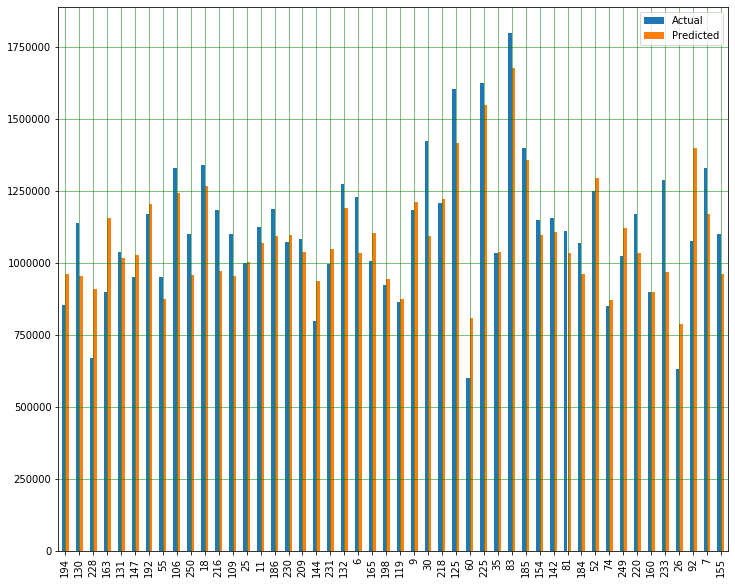

In [223]:
dfTvP2.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [224]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1/1000, y_pred2/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1/1000, y_pred2/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1/1000, y_pred2/1000)))


Mean Absolute Error: 107.66090833613009
Mean Squared Error: 19040.966864059203
Root Mean Squared Error: 137.98900993941223


Now that we have looked at both model on each of the zipcode 95131 and 95131. We implemented dummy coding to include property type as a feature we look at for the dataset in 95131, and did see we got a smaller error. Now I am interested to see if combining the data from the two zipcode, effectively double the training data size, to see if it will increase our accuracy. Another thing we could potentially look at, is going 2 years back into the home sale data instead of one year. Or even look at a surrounding zipcode of interest, 95035.

In [245]:
# Properties sold in 95131 for the past year
df5 = df95131sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df5 = df5[df5["PROPERTY TYPE"] != 'Mobile/Manufactured Home']

df5.dropna(subset=['BEDS', 'BATHS'], inplace=True)

df5["AGE OF HOME"] = 2020 - df5["YEAR BUILT"]

df5

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Condo/Co-op,825000,2.00,2.00,"1,157.00",nan,"1,993.00",713.00,265.00,27.00
1,Condo/Co-op,1025000,3.00,2.50,"1,790.00",915.00,"1,993.00",573.00,299.00,27.00
2,Condo/Co-op,1190000,3.00,3.50,"1,718.00",621.00,"2,015.00",693.00,275.00,5.00
3,Townhouse,1051000,4.00,3.00,"2,009.00","3,200.00","1,989.00",523.00,265.00,31.00
4,Townhouse,1040000,3.00,2.50,"1,666.00","2,547.00","1,989.00",624.00,265.00,31.00
...,...,...,...,...,...,...,...,...,...,...
214,Townhouse,960000,3.00,3.00,"1,536.00",645.00,"2,008.00",625.00,182.00,12.00
215,Condo/Co-op,930000,3.00,2.00,"1,546.00","1,546.00","2,006.00",602.00,320.00,14.00
216,Condo/Co-op,1250000,4.00,3.00,"2,036.00",nan,"2,006.00",614.00,nan,14.00
217,Townhouse,1115000,4.00,4.00,"1,573.00",784.00,"2,009.00",709.00,150.00,11.00


In [248]:
# Properties sold in 95131 for the past year

df6 = df95132sold[["PROPERTY TYPE", "PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", "YEAR BUILT", "$/SQUARE FEET", "HOA/MONTH"]]

df6 = df6[df6["PROPERTY TYPE"] != 'Vacant Land']

df6.dropna(subset=["PRICE", "BEDS", "BATHS", "SQUARE FEET"], inplace=True)

df6["AGE OF HOME"] = 2020 - df6["YEAR BUILT"]

df6

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Townhouse,"800,000.00",4.00,2.50,"1,474.00","1,055.00","1,970.00",543.00,235.00,50.00
1,Condo/Co-op,"810,088.00",2.00,2.50,"1,450.00","1,300.00","2,014.00",559.00,210.00,6.00
2,Condo/Co-op,"600,000.00",2.00,1.00,884.00,"1,440.00","1,971.00",679.00,230.00,49.00
4,Single Family Residential,"1,050,000.00",4.00,2.00,"1,480.00","6,307.00","1,970.00",709.00,nan,50.00
5,Single Family Residential,"1,072,500.00",3.00,2.00,"1,372.00","6,202.00","1,971.00",782.00,nan,49.00
...,...,...,...,...,...,...,...,...,...,...
245,Single Family Residential,"1,475,000.00",4.00,2.50,"2,510.00","8,001.00","1,971.00",588.00,nan,49.00
246,Condo/Co-op,"595,000.00",2.00,2.00,831.00,931.00,"1,988.00",716.00,330.00,32.00
247,Single Family Residential,"1,030,000.00",5.00,3.00,"1,786.00","6,099.00","1,964.00",577.00,nan,56.00
249,Single Family Residential,"1,025,000.00",4.00,2.00,"1,659.00","5,962.00","1,967.00",618.00,nan,53.00


In [249]:
# Combining the dataframes

df7 = pd.concat([df5, df6])
df7

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME
0,Condo/Co-op,"825,000.00",2.00,2.00,"1,157.00",nan,"1,993.00",713.00,265.00,27.00
1,Condo/Co-op,"1,025,000.00",3.00,2.50,"1,790.00",915.00,"1,993.00",573.00,299.00,27.00
2,Condo/Co-op,"1,190,000.00",3.00,3.50,"1,718.00",621.00,"2,015.00",693.00,275.00,5.00
3,Townhouse,"1,051,000.00",4.00,3.00,"2,009.00","3,200.00","1,989.00",523.00,265.00,31.00
4,Townhouse,"1,040,000.00",3.00,2.50,"1,666.00","2,547.00","1,989.00",624.00,265.00,31.00
...,...,...,...,...,...,...,...,...,...,...
245,Single Family Residential,"1,475,000.00",4.00,2.50,"2,510.00","8,001.00","1,971.00",588.00,nan,49.00
246,Condo/Co-op,"595,000.00",2.00,2.00,831.00,931.00,"1,988.00",716.00,330.00,32.00
247,Single Family Residential,"1,030,000.00",5.00,3.00,"1,786.00","6,099.00","1,964.00",577.00,nan,56.00
249,Single Family Residential,"1,025,000.00",4.00,2.00,"1,659.00","5,962.00","1,967.00",618.00,nan,53.00


In [253]:
# We saw that using dummies does improve our accuracies, so we will go ahead and do that here as well

# Training and Testing 95131 and 95132 Separately
dummies = pd.get_dummies(df7["PROPERTY TYPE"])
#df7 = pd.concat([df7, dummies], axis=1)
df7
train, test = train_test_split(df7, test_size=0.2)
train

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
188,Single Family Residential,"755,000.00",2.00,1.00,937.00,"7,017.00","1,973.00",806.00,15.00,47.00,0,1,0
60,Single Family Residential,"1,096,000.00",4.00,2.00,"1,234.00","5,508.00","1,973.00",888.00,nan,47.00,0,1,0
90,Single Family Residential,"1,200,000.00",4.00,2.00,"2,043.00","6,211.00","1,969.00",587.00,nan,51.00,0,1,0
61,Single Family Residential,"1,390,000.00",4.00,3.00,"2,585.00","6,000.00","1,976.00",538.00,nan,44.00,0,1,0
54,Townhouse,"1,125,000.00",3.00,3.00,"1,851.00",750.00,"2,014.00",608.00,215.00,6.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Single Family Residential,"1,260,000.00",3.00,2.50,"1,767.00","2,783.00","1,999.00",713.00,50.00,21.00,0,1,0
157,Single Family Residential,"911,000.00",4.00,2.00,"1,168.00","5,801.00","1,971.00",780.00,nan,49.00,0,1,0
113,Single Family Residential,"1,130,000.00",3.00,3.00,"1,645.00","5,079.00","1,988.00",687.00,nan,32.00,0,1,0
84,Single Family Residential,"1,170,000.00",3.00,2.00,"1,374.00","6,200.00","1,969.00",852.00,nan,51.00,0,1,0


In [254]:
X_train = train[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_train = train["PRICE"]
X_test = test[["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"]]
y_test = test["PRICE"]

X_train



,BEDS,BATHS,SQUARE FEET,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
188,2.00,1.00,937.00,47.00,0,1,0
60,4.00,2.00,"1,234.00",47.00,0,1,0
90,4.00,2.00,"2,043.00",51.00,0,1,0
61,4.00,3.00,"2,585.00",44.00,0,1,0
54,3.00,3.00,"1,851.00",6.00,0,0,1
...,...,...,...,...,...,...,...
50,3.00,2.50,"1,767.00",21.00,0,1,0
157,4.00,2.00,"1,168.00",49.00,0,1,0
113,3.00,3.00,"1,645.00",32.00,0,1,0
84,3.00,2.00,"1,374.00",51.00,0,1,0


In [255]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)
y_pred


array([1003717.76371488, 1363261.42720913, 1066467.39491116,
       1327601.27691872, 1203273.70884906,  873299.00107337,
       1154434.87109159,  888826.66654961,  737227.87083413,
       1069274.11213186,  898042.02469453, 1234656.08513715,
        714954.56299255,  975083.44403595,  955174.18358882,
       1275906.71526893, 1143904.25437502, 1384620.25225152,
        620434.97847049,  733637.23399254, 1065940.7759031 ,
       1219872.68849283, 1229098.94849679,  933226.84566368,
        573078.22230906,  922879.48293744,  891047.4220686 ,
       1034713.76797776, 1358726.15492964, 1241600.69483375,
        933711.59945822,  722177.29985033, 1495213.74950401,
       1223053.83091709, 1087749.28552626, 1136526.03786304,
       1150628.79885069, 1004182.96397223, 1026504.10630725,
       1100156.61324552, 1177189.29690604,  952148.06007494,
       1039675.80011022, 1102816.84957241, 1078445.67467591,
       1020736.50954754,  620434.97847049,  805057.07517268,
       1043638.30168054,

In [256]:
pd.options.display.float_format = '{:,.2f}'.format

dfLarge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfLarge

,Actual,Predicted
205,"1,130,000.00","1,003,717.76"
131,"1,290,000.00","1,363,261.43"
209,"1,085,000.00","1,066,467.39"
14,"1,425,000.00","1,327,601.28"
62,"1,320,000.00","1,203,273.71"
...,...,...
128,"1,100,000.00","1,027,098.79"
125,"1,605,000.00","1,408,562.18"
69,"1,760,000.00","969,021.80"
84,"750,000.00","798,501.73"


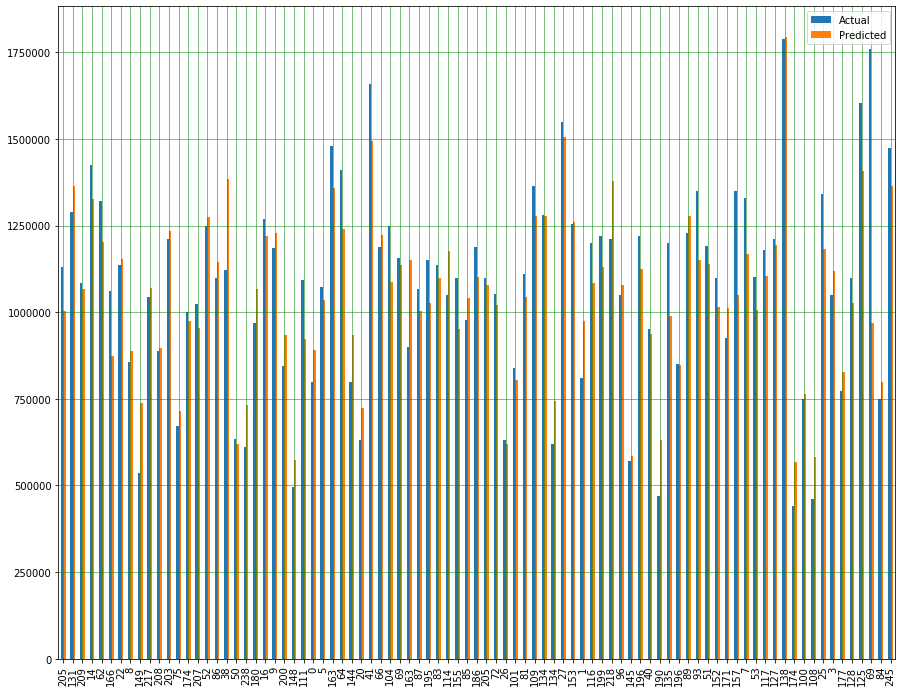

In [259]:
dfLarge.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [258]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test/1000, y_pred/1000))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test/1000, y_pred/1000))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test/1000, y_pred/1000)))


Mean Absolute Error: 96.07051722135542
Mean Squared Error: 19160.261534217883
Root Mean Squared Error: 138.42059649567287


In [282]:
df7[ df7["PRICE"] >= 1760000]


,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
102,Condo/Co-op,"3,810,000.00",3.00,3.00,"1,850.00",nan,"2,015.00","2,059.00",nan,5.00,1,0,0
48,Condo/Co-op,"2,454,000.00",4.00,3.00,"1,452.00",nan,"1,976.00","1,690.00",nan,44.00,1,0,0
69,Single Family Residential,"1,760,000.00",3.00,2.00,"1,325.00","5,980.00","1,962.00","1,328.00",nan,58.00,0,1,0
83,Single Family Residential,"1,800,000.00",5.00,4.00,"3,440.00","55,625.00","1,998.00",523.00,nan,22.00,0,1,0
138,Single Family Residential,"1,790,000.00",4.00,3.00,"3,730.00","14,715.00","1,997.00",480.00,nan,23.00,0,1,0
215,Single Family Residential,"2,000,000.00",4.00,3.50,"4,107.00","596,772.00","1,991.00",487.00,nan,29.00,0,1,0


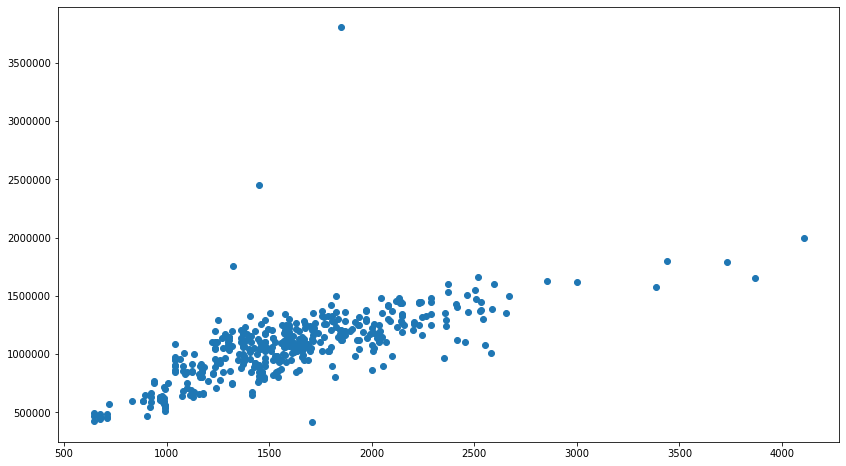

In [266]:
# Noticing Outliers
fig, ax = plt.subplots(figsize=(14,8))
scatterplot = plt.scatter(df7['SQUARE FEET'], df7['PRICE'])


In [300]:
data = [[2, 1.5, 1003, 44, 1, 0, 0]]
ex = pd.DataFrame(data, columns = ["BEDS", "BATHS", "SQUARE FEET", "AGE OF HOME", "Condo/Co-op", "Single Family Residential", "Townhouse"])
ex

,BEDS,BATHS,SQUARE FEET,AGE OF HOME,Condo/Co-op,Single Family Residential,Townhouse
0,2,1.50,1003,44,1,0,0


In [301]:
prediction = lm.predict(ex)
'${:,.2f}'.format(prediction[0])

'$680,472.90'